In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
website = "http://bit.ly/w-data"
student_data = pd.read_csv(website)
student_data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.shape

(25, 2)

In [4]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

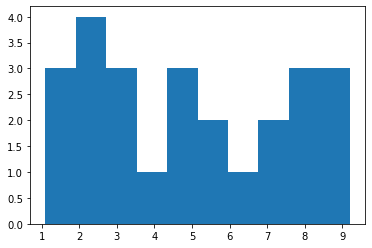

In [6]:
plt.hist(student_data["Hours"])


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

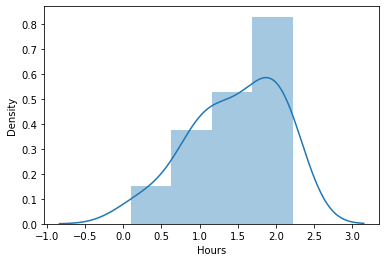

In [7]:

x=student_data["Hours"].apply(np.log)
sns.distplot(x)

In [8]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

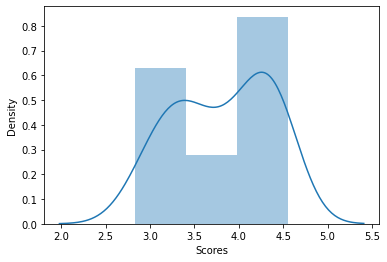

In [9]:
x=student_data["Scores"].apply(np.log)
sns.distplot(x)

In [10]:
X = student_data.drop("Scores",axis=1)
y = student_data.Scores

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [13]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [14]:

print("Average error of the model::",sqrt(mean_squared_error(y_test, predictions)))

Average error of the model:: 4.500348757286426


In [15]:
train_score=model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(train_score*100)
print(test_score*100)
# train and test score we get almost same they both close with each other it means that their is no overfitting problem.

94.74914516608874
96.37436465558612


In [16]:
x=pd.DataFrame({"actual": y_test,"predicted":predictions})
x

,actual,predicted
21,54,49.018374
11,62,59.962046
23,76,69.910839
6,88,92.793063
9,25,28.125909
16,30,26.136151
14,17,12.207841
12,41,46.033736


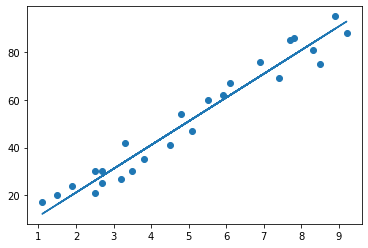

In [17]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

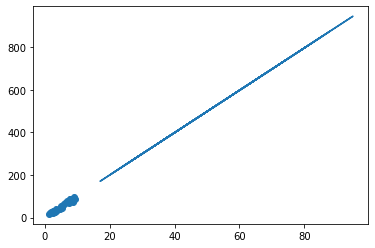

In [18]:
line = model.coef_*y+model.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(y, line);
plt.show()

In [19]:
m, b = np.polyfit(y_test,predictions,1)# m=Slope, b=intercept
m,b

(1.01872789222075, -2.021512661241413)

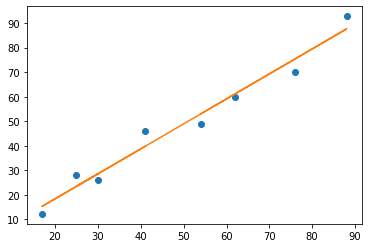

In [20]:
plt.plot(y_test,predictions, 'o')
plt.plot(y_test, m*y_test + b)#
